In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('crop_recommendation.csv',encoding = 'latin1')

In [4]:
df.head()

Nitrogen  Phosphorous  Potassium  temperature   humidity        ph label  \
0        90           42         43    20.879744  82.002744  6.502985  rice   
1        85           58         41    21.770462  80.319644  7.038096  rice   
2        60           55         44    23.004459  82.320763  7.840207  rice   
3        74           35         40    26.491096  80.158363  6.980401  rice   
4        78           42         42    20.130175  81.604873  7.628473  rice   

                                               Seeds  
0  https://panseeds.in/product-category/improved-...  
1  https://panseeds.in/product-category/improved-...  
2  https://panseeds.in/product-category/improved-...  
3  https://panseeds.in/product-category/improved-...  
4  https://panseeds.in/product-category/improved-...

In [5]:
df.tail()

Nitrogen  Phosphorous  Potassium  temperature   humidity        ph  \
2195       107           34         32    26.774637  66.413269  6.780064   
2196        99           15         27    27.417112  56.636362  6.086922   
2197       118           33         30    24.131797  67.225123  6.362608   
2198       117           32         34    26.272418  52.127394  6.758793   
2199       104           18         30    23.603016  60.396475  6.779833   

       label                                              Seeds  
2195  coffee  https://www.amazon.in/dp/B09BRFTJDJ?tag=bgms-2...  
2196  coffee  https://www.amazon.in/dp/B09BRFTJDJ?tag=bgms-2...  
2197  coffee  https://www.amazon.in/dp/B09BRFTJDJ?tag=bgms-2...  
2198  coffee  https://www.amazon.in/dp/B09BRFTJDJ?tag=bgms-2...  
2199  coffee  https://www.amazon.in/dp/B09BRFTJDJ?tag=bgms-2...

In [6]:
df.columns

Index(['Nitrogen', 'Phosphorous', 'Potassium', 'temperature', 'humidity', 'ph',
       'label', 'Seeds'],
      dtype='object')

In [7]:
df.shape

(2200, 8)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Nitrogen       0
Phosphorous    0
Potassium      0
temperature    0
humidity       0
ph             0
label          0
Seeds          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorous  2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   label        2200 non-null   object 
 7   Seeds        2200 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 137.6+ KB


In [11]:
df.describe()

Nitrogen  Phosphorous    Potassium  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph  
count  2200.000000  
mean      6.469480  
std       0.773938  
min       3.504752  
25%       5.971693  
50%       6.425045  
75%       6.923643  
max       9.935091

In [12]:
df.nunique()

Nitrogen        137
Phosphorous     117
Potassium        73
temperature    2200
humidity       2200
ph             2200
label            22
Seeds            22
dtype: int64

In [13]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['label', 'Seeds'], dtype='object')

Numerical type columns:
Index(['Nitrogen', 'Phosphorous', 'Potassium', 'temperature', 'humidity',
       'ph'],
      dtype='object')


In [14]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 15:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [15]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [16]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: []
Non-Categorical Features: ['label', 'Seeds']
Discrete Features: []
Continuous Features: ['Nitrogen', 'Phosphorous', 'Potassium', 'temperature', 'humidity', 'ph']


In [17]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

In [18]:
for i in discrete:
    print(df[i].value_counts())
    print()

In [19]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

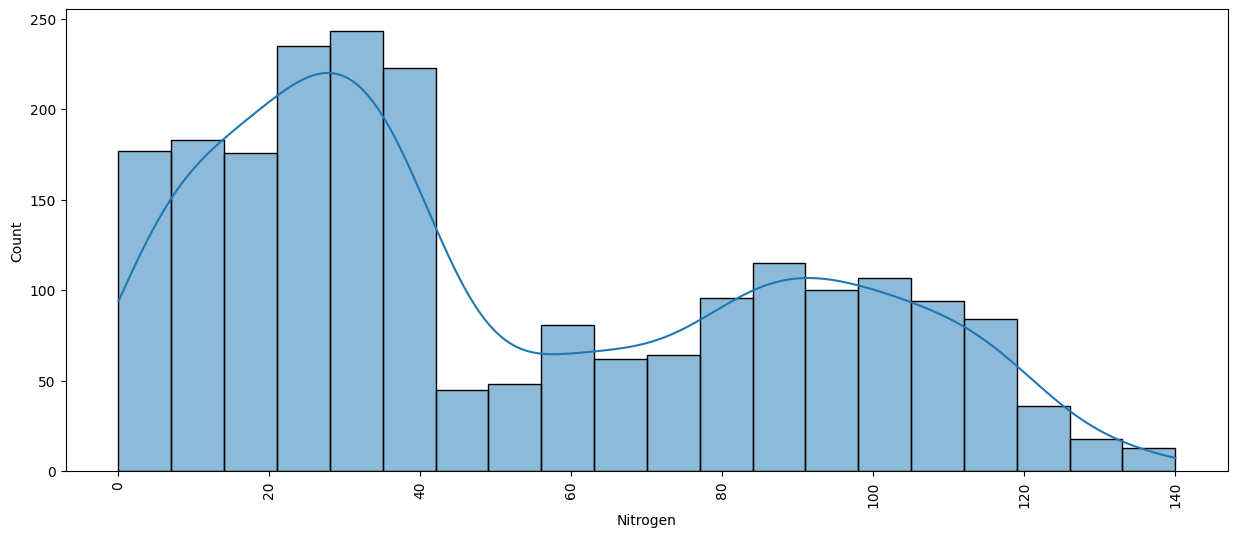

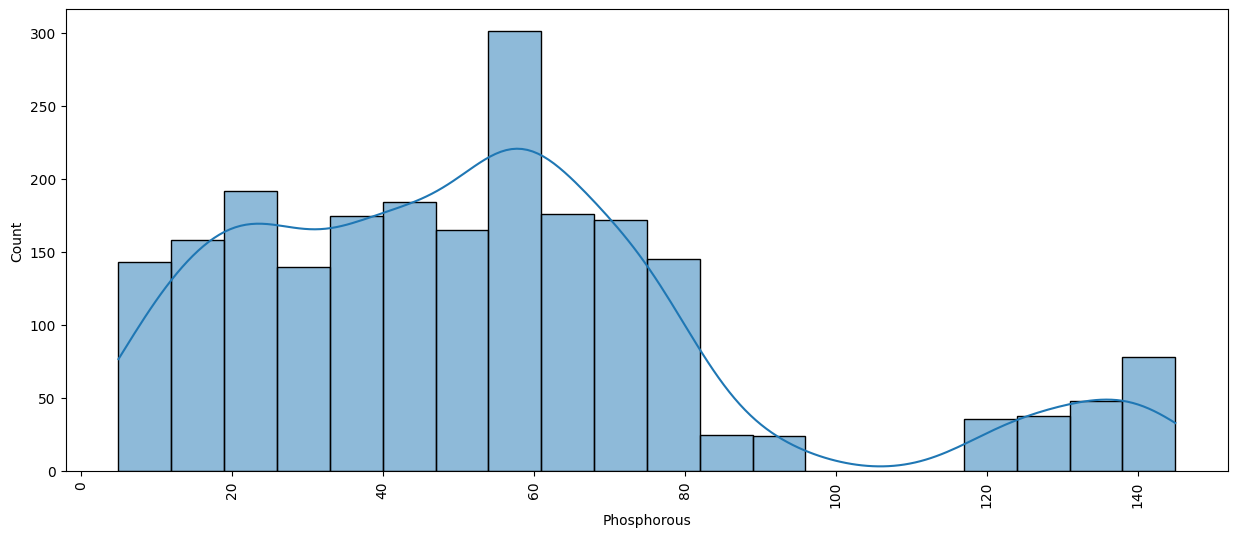

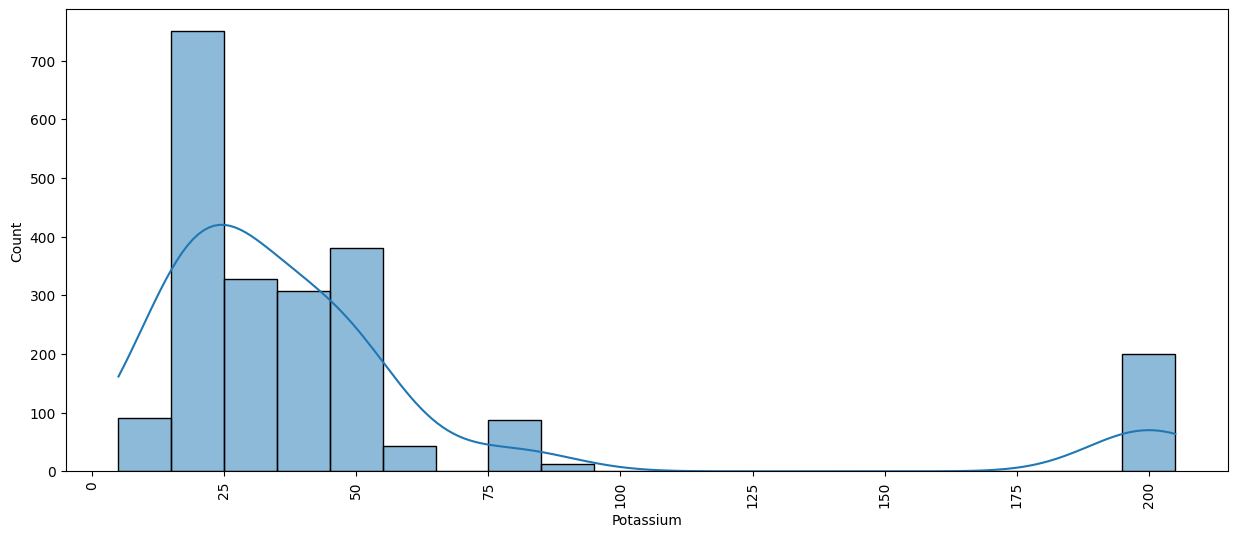

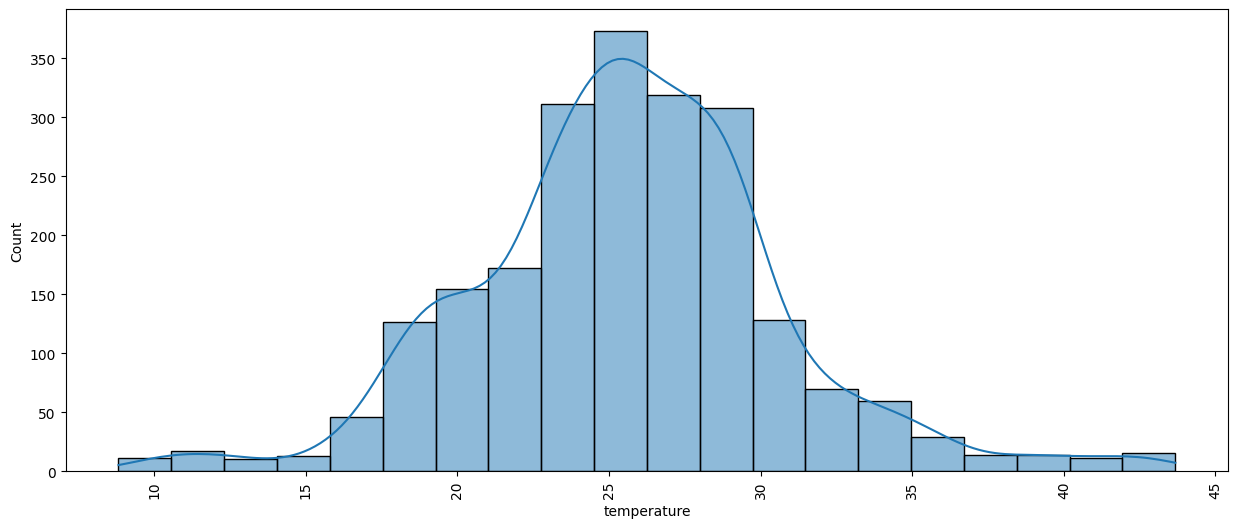

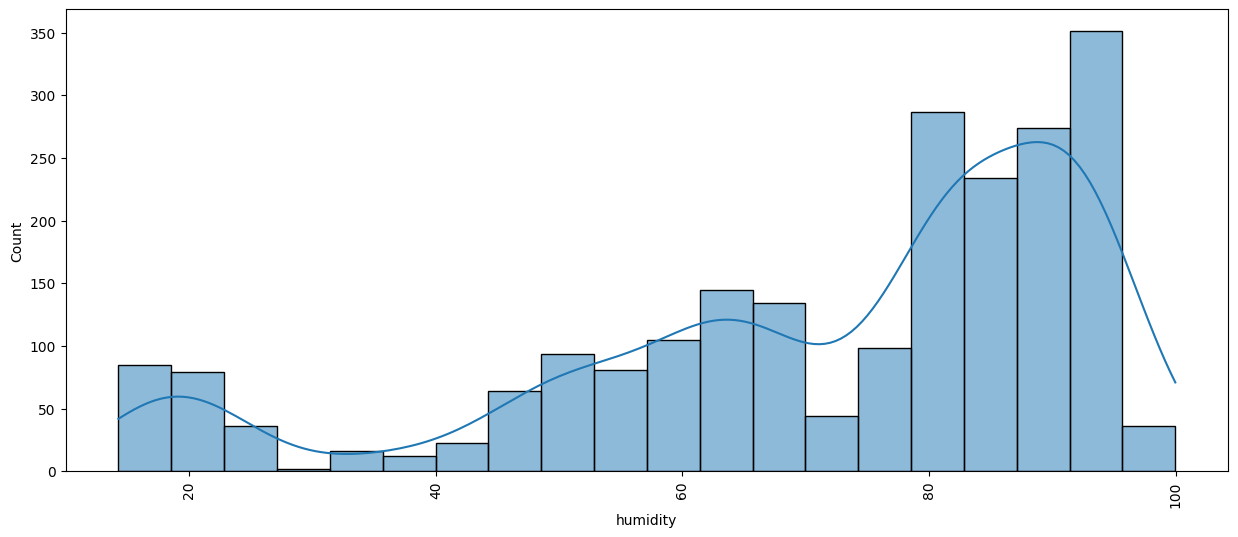

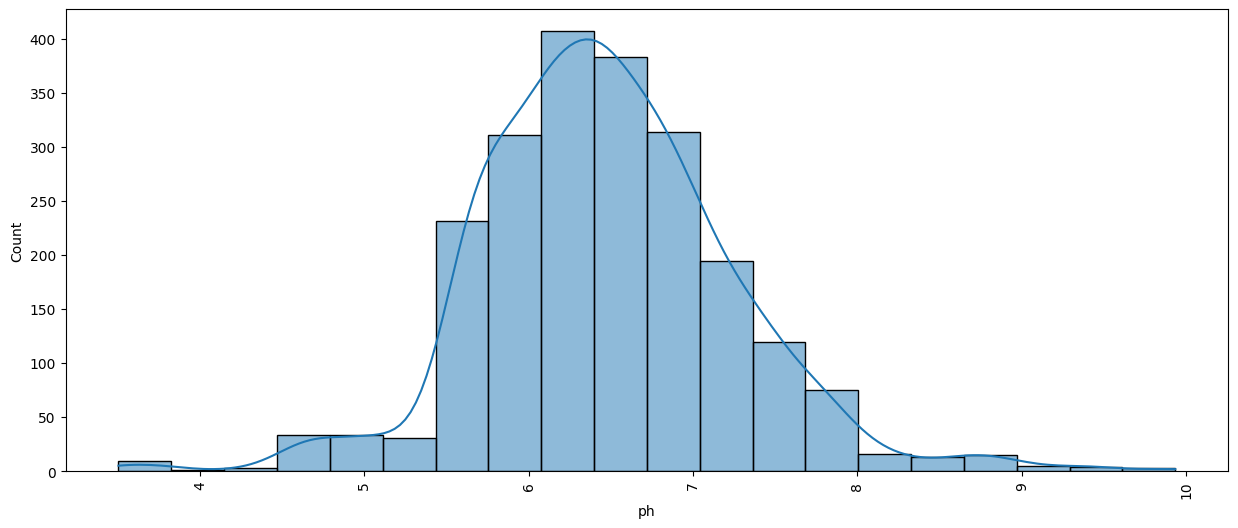

In [20]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

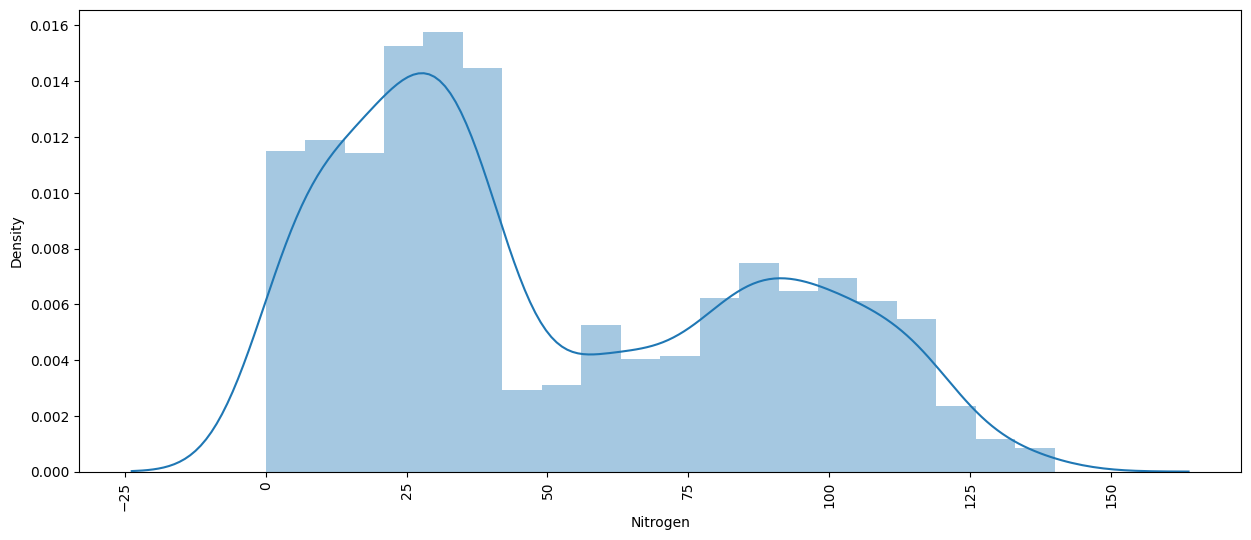

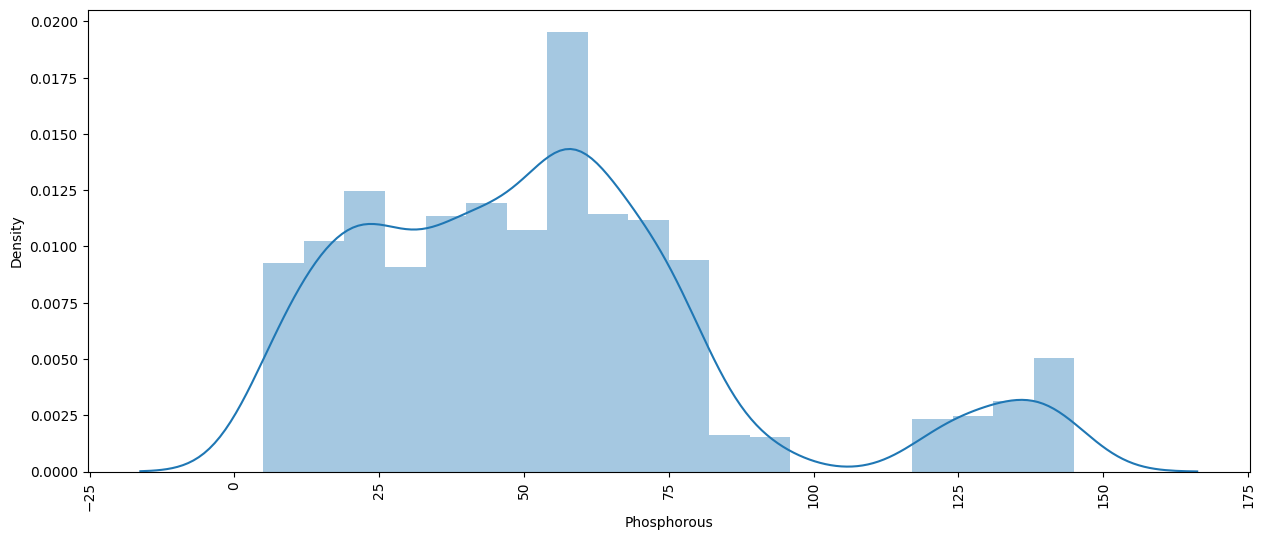

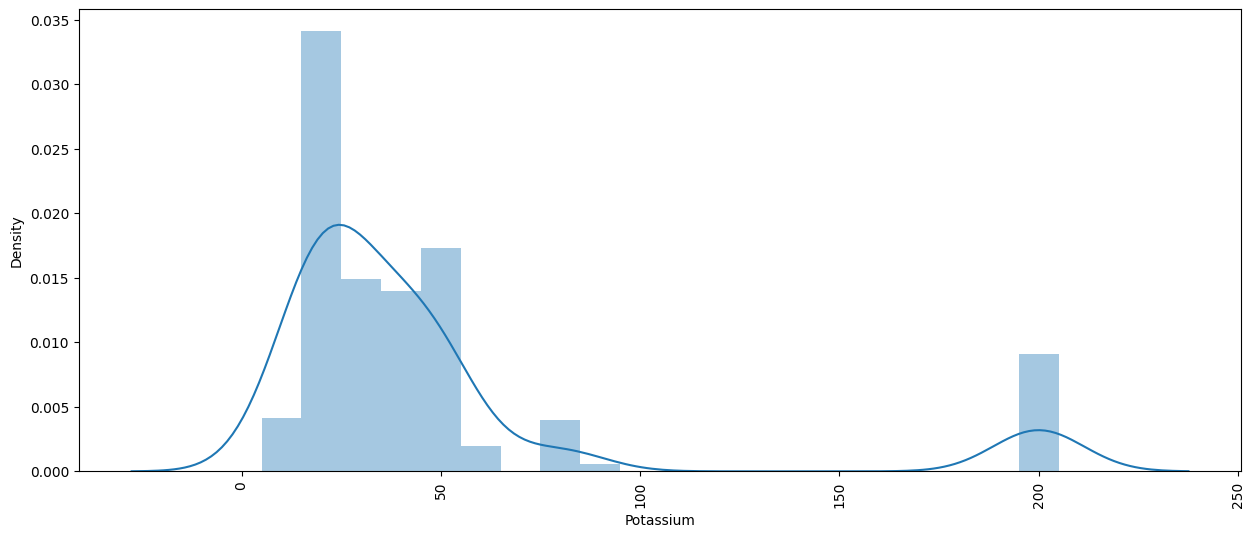

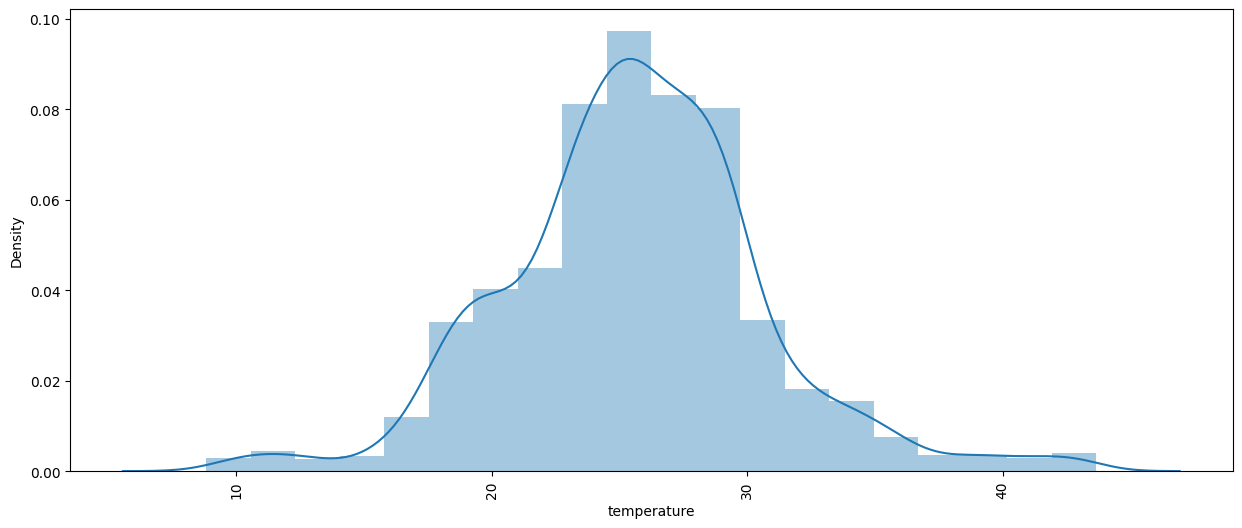

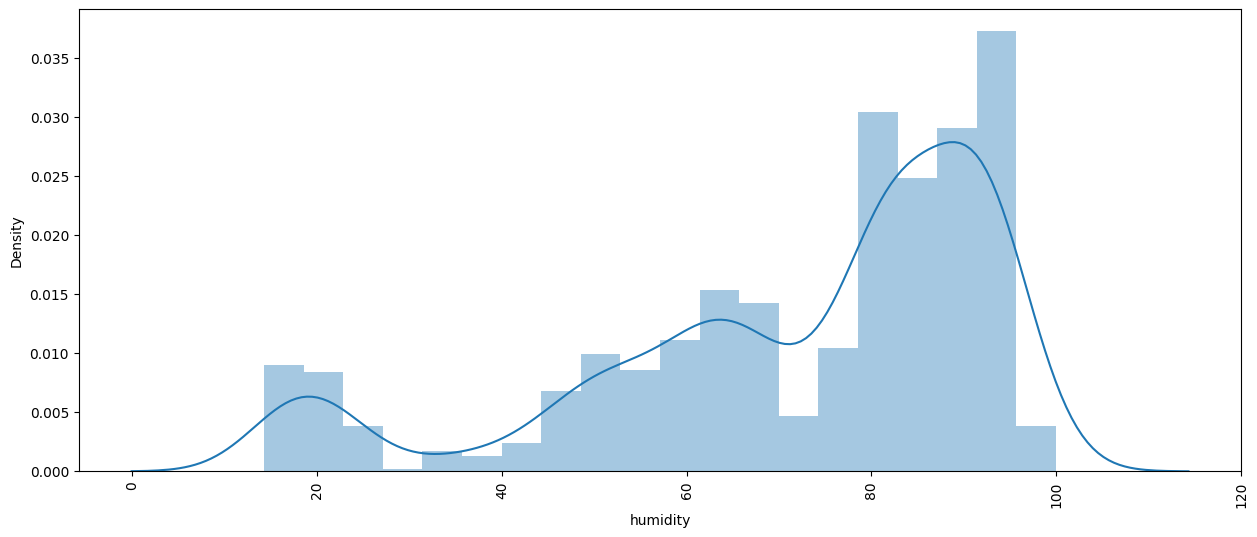

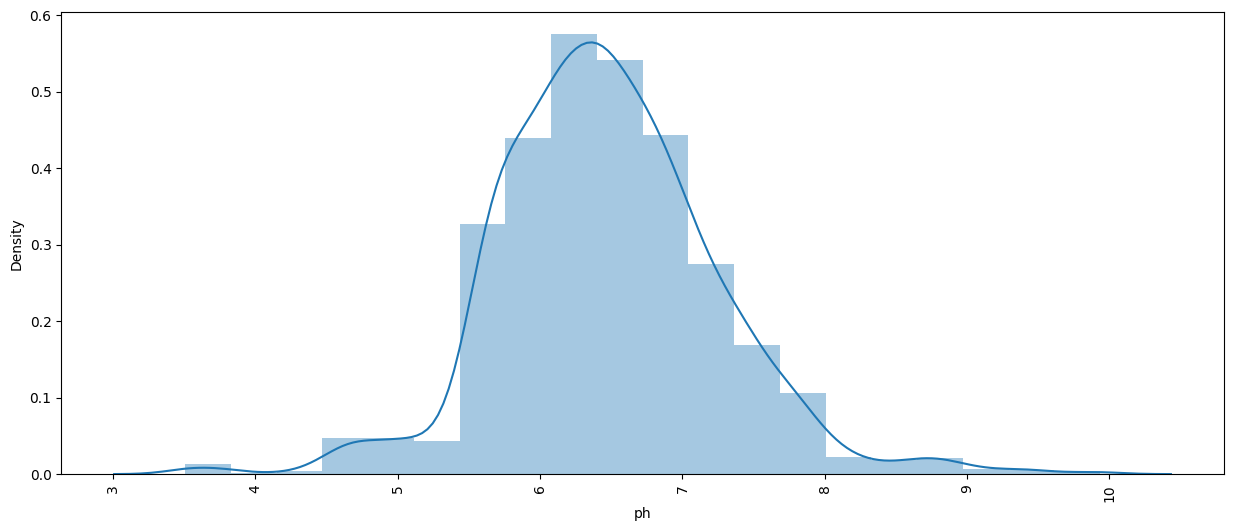

In [21]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

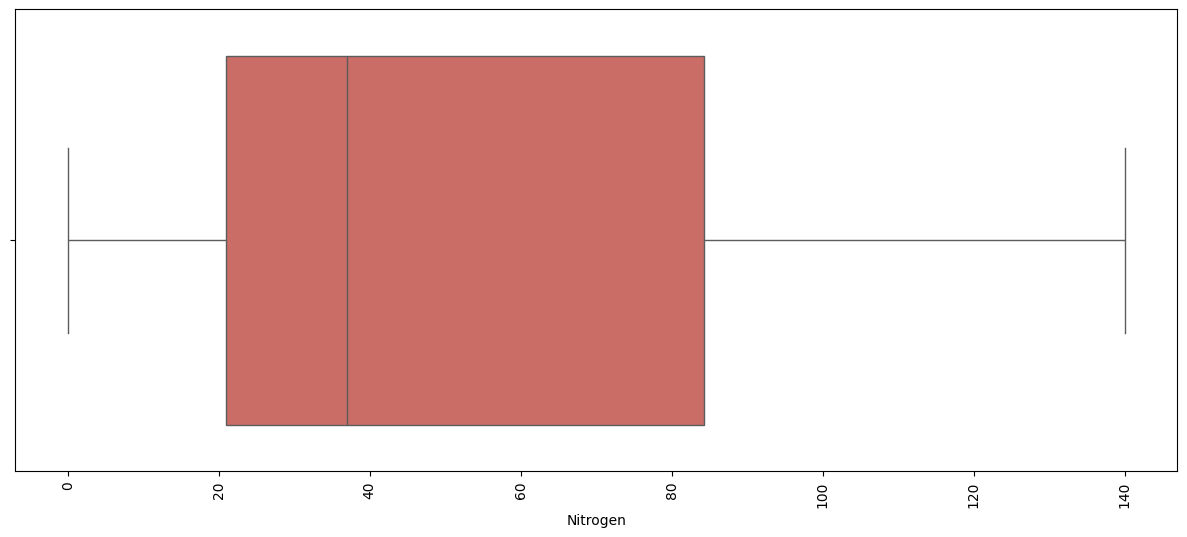

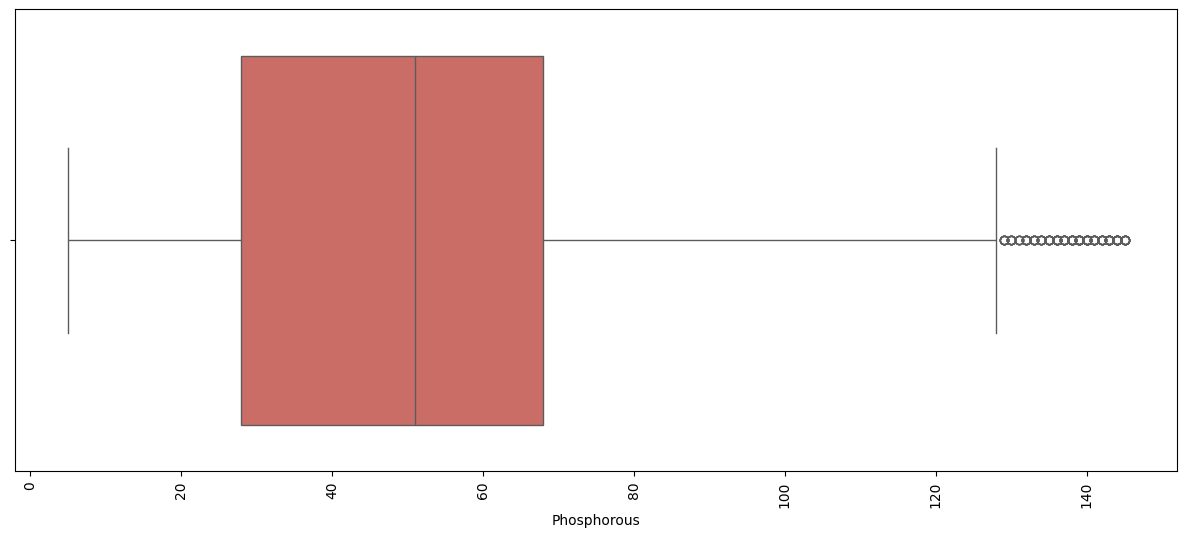

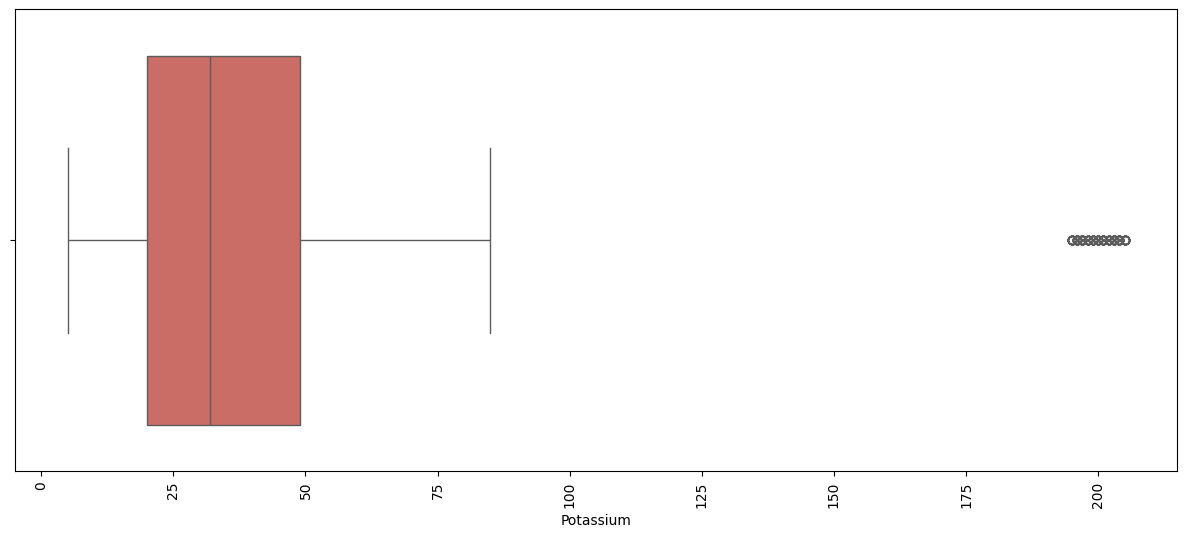

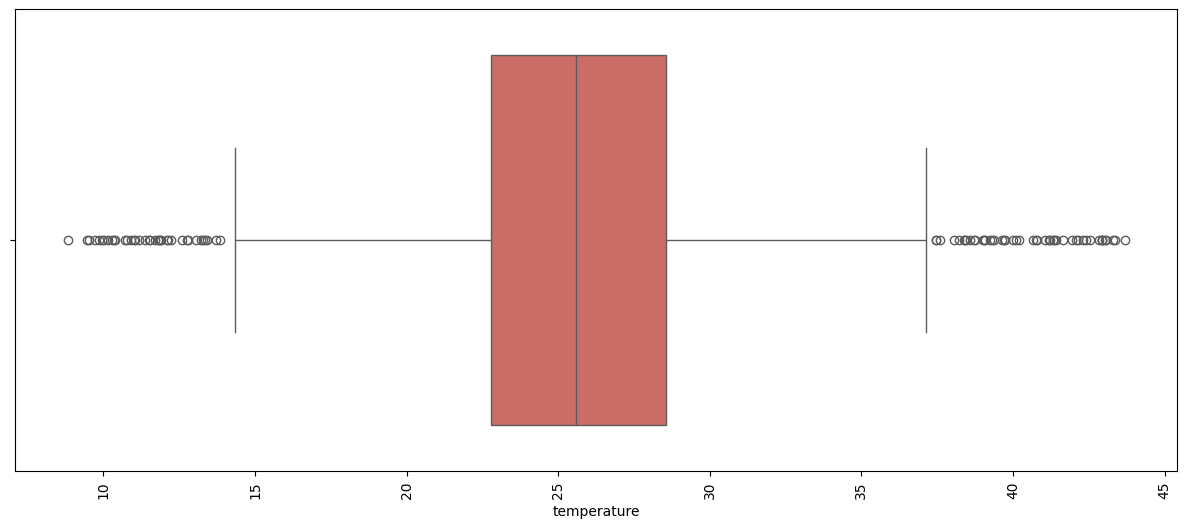

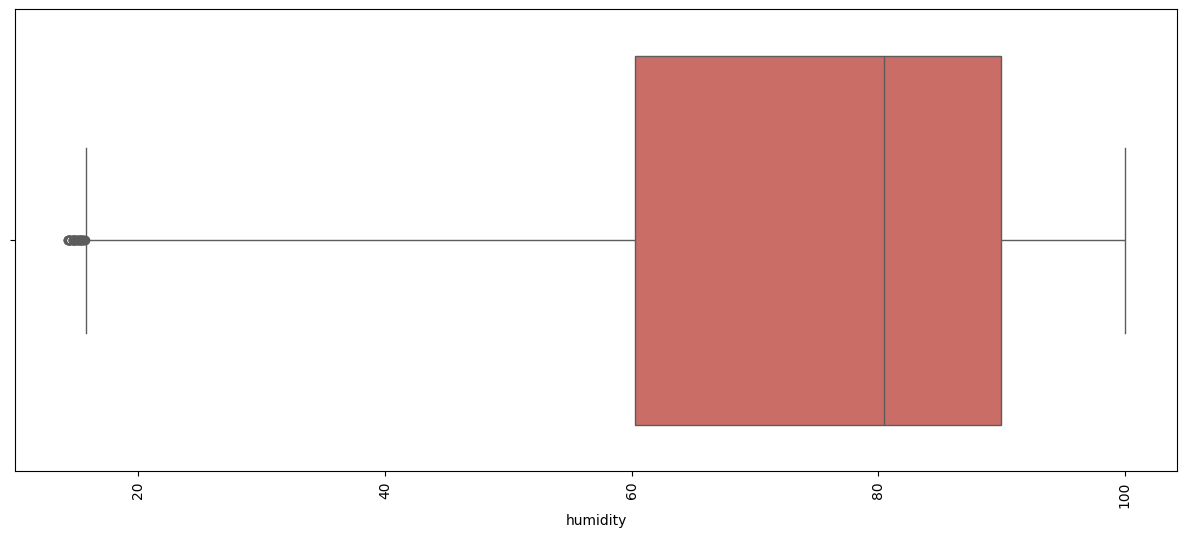

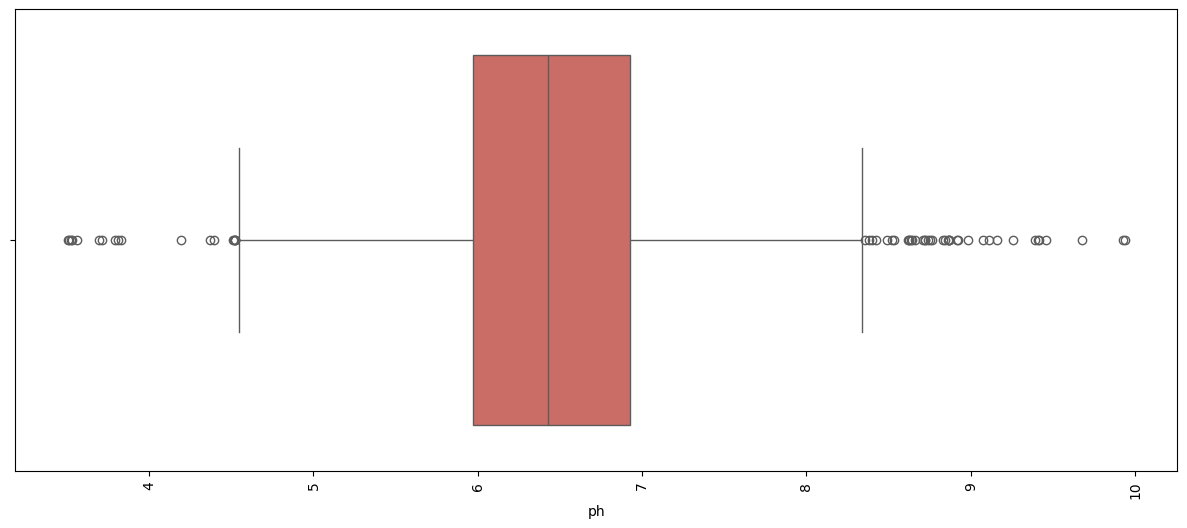

In [22]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

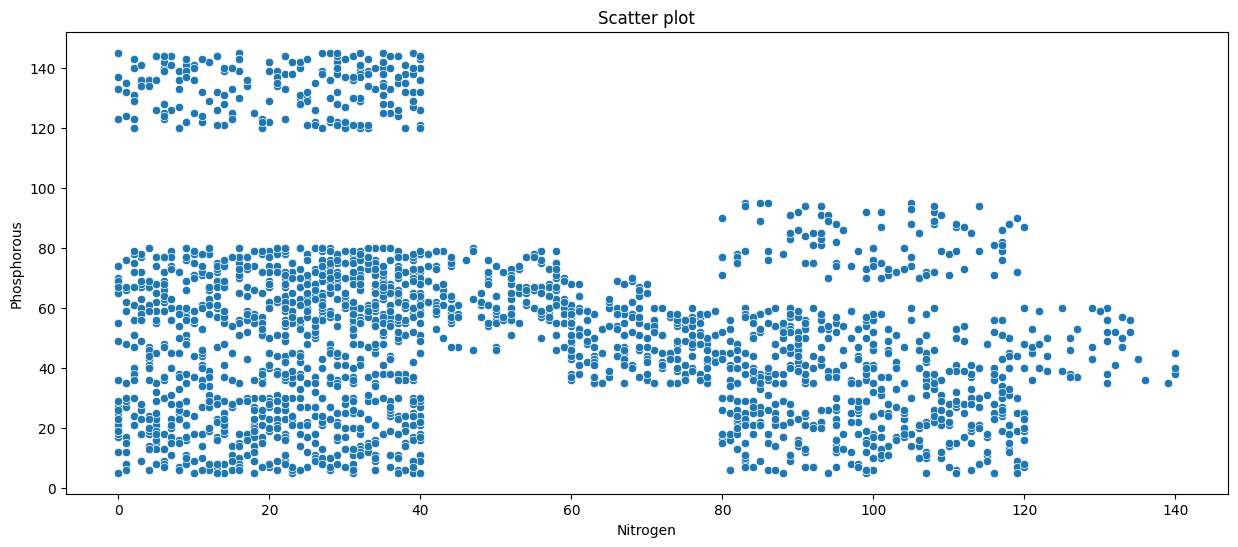

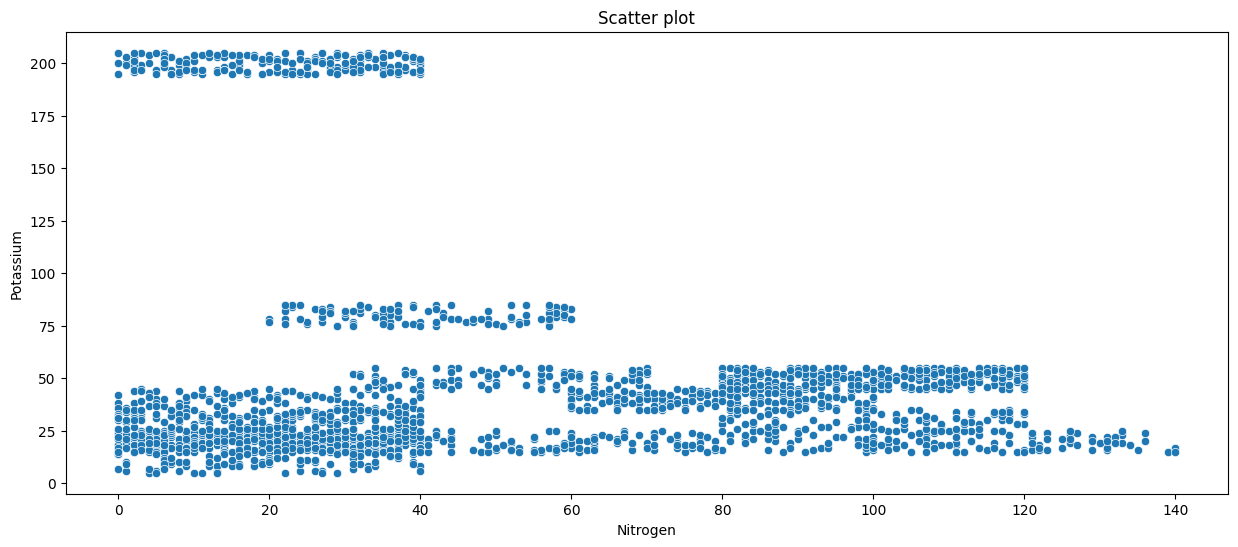

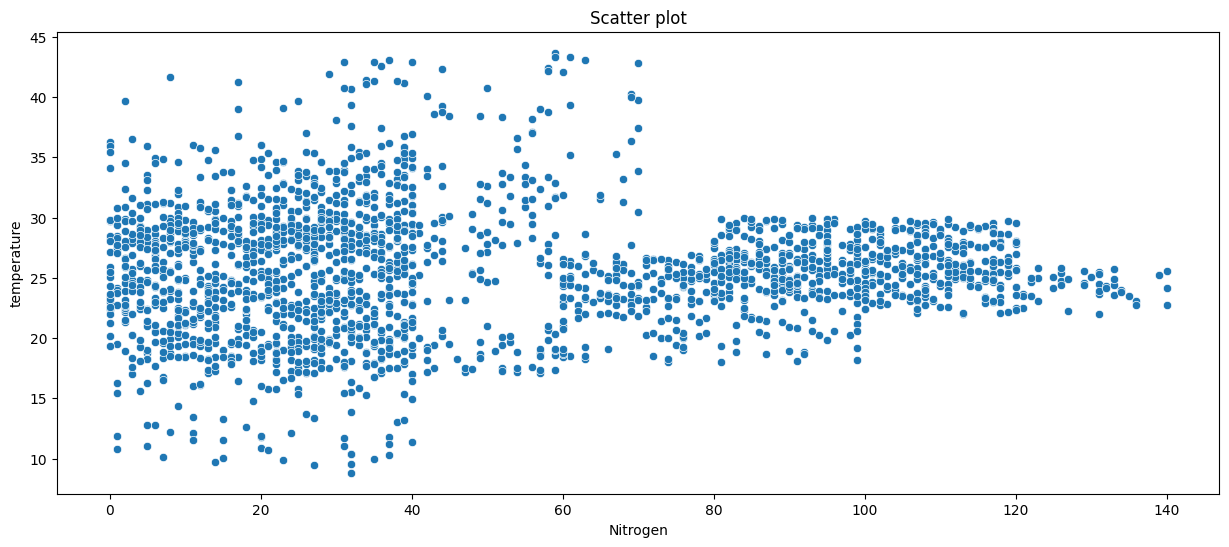

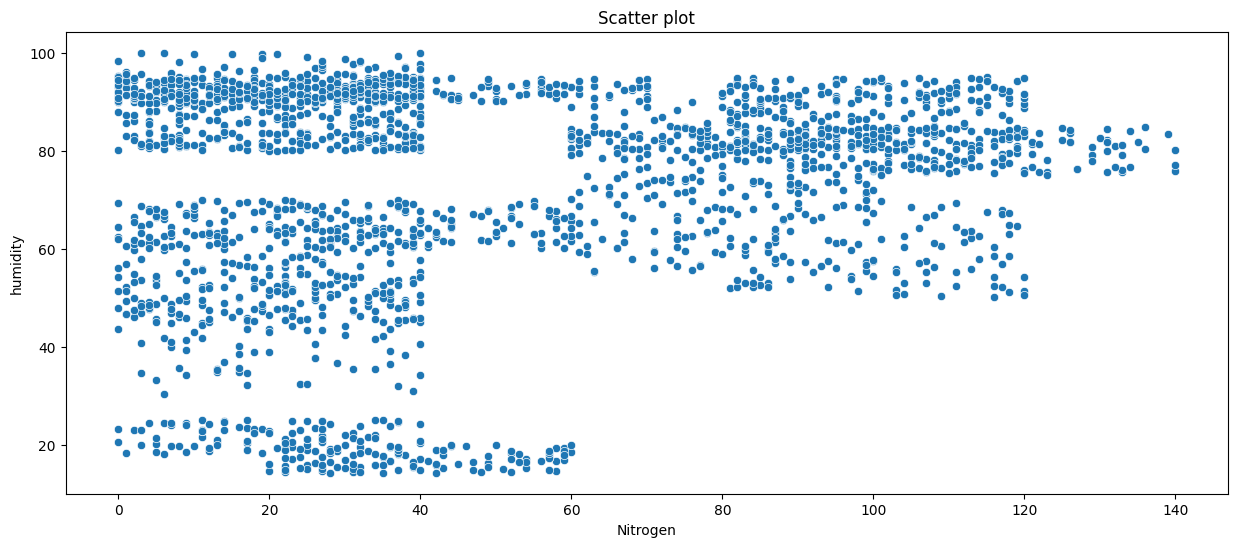

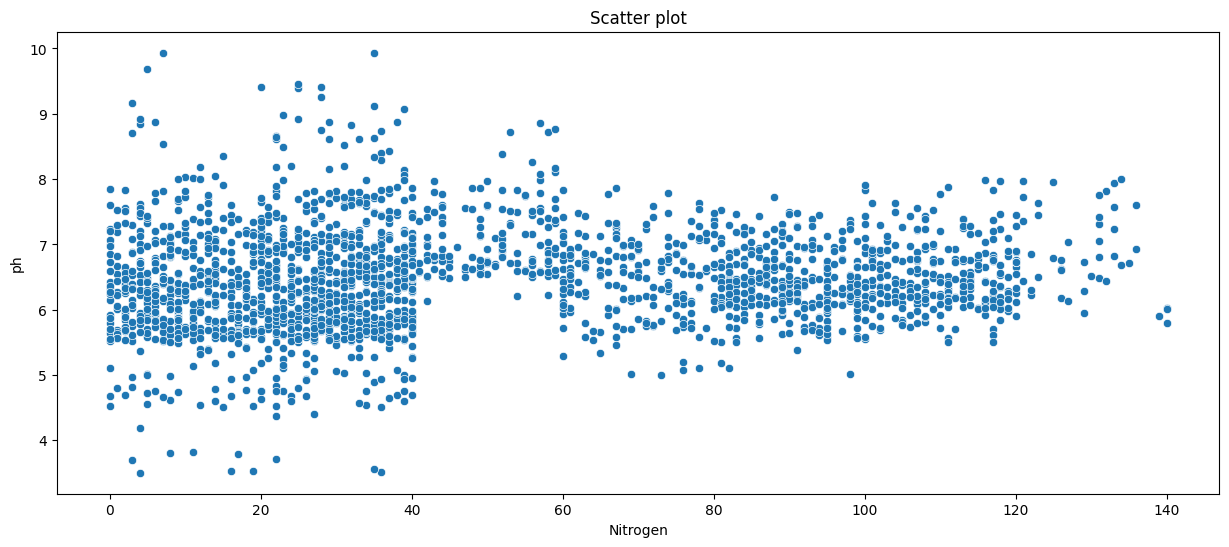

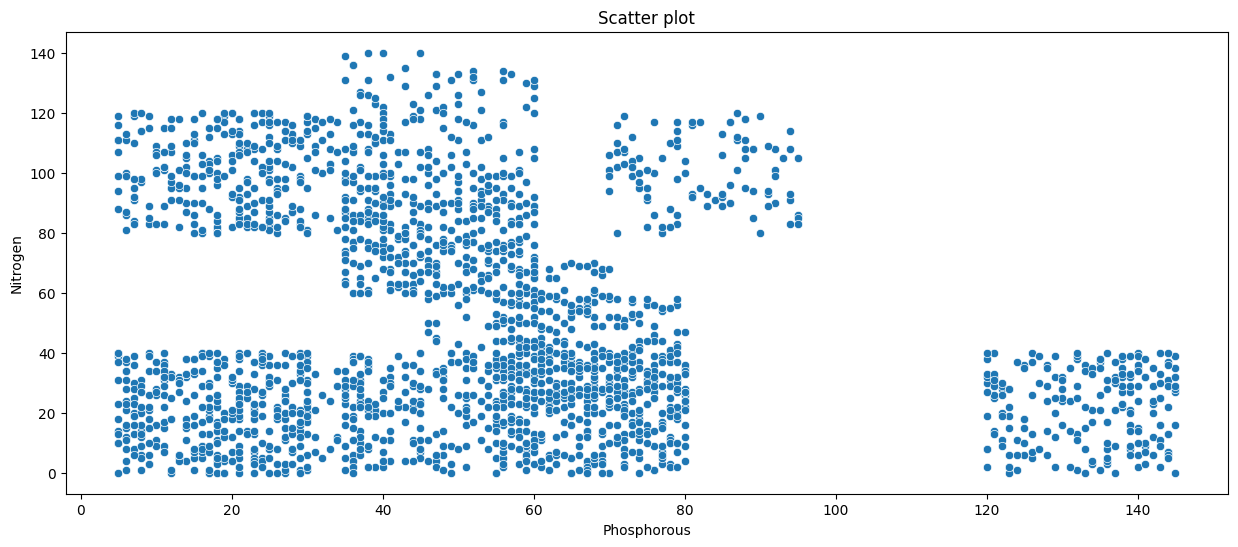

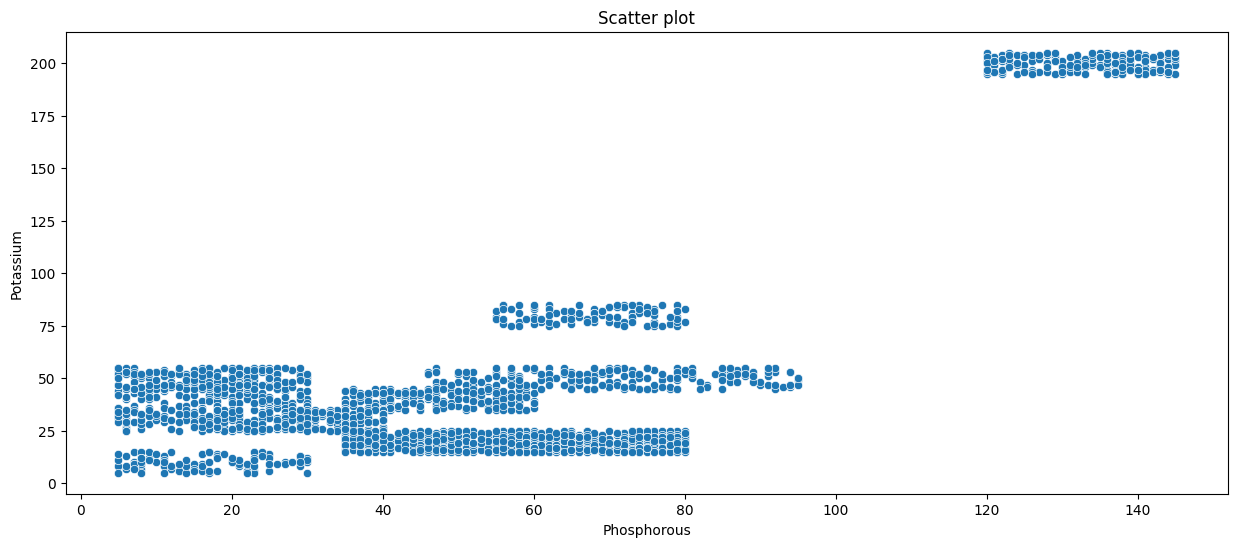

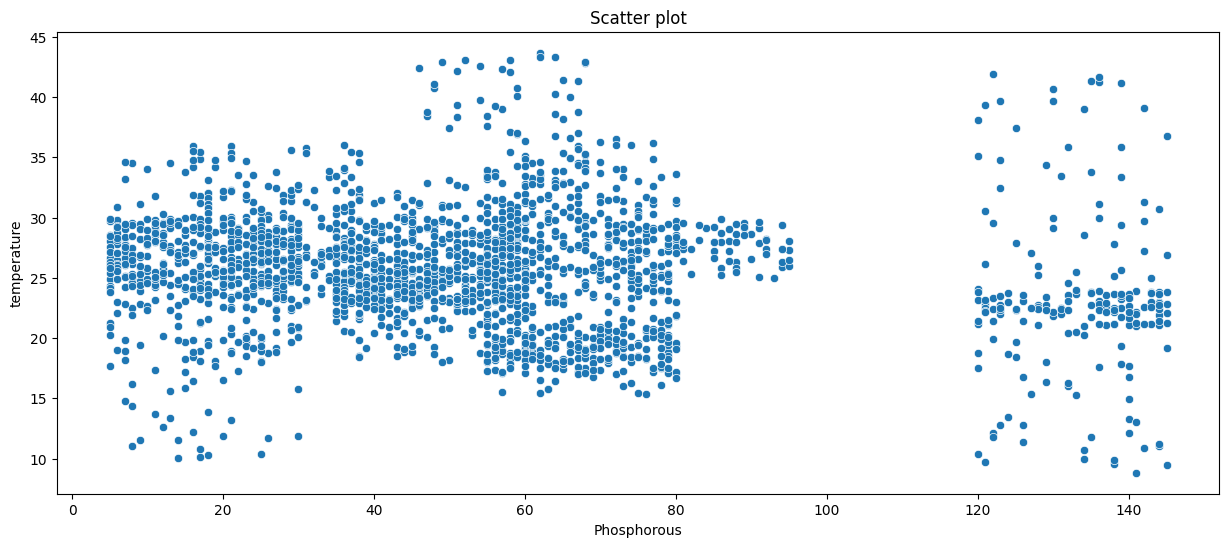

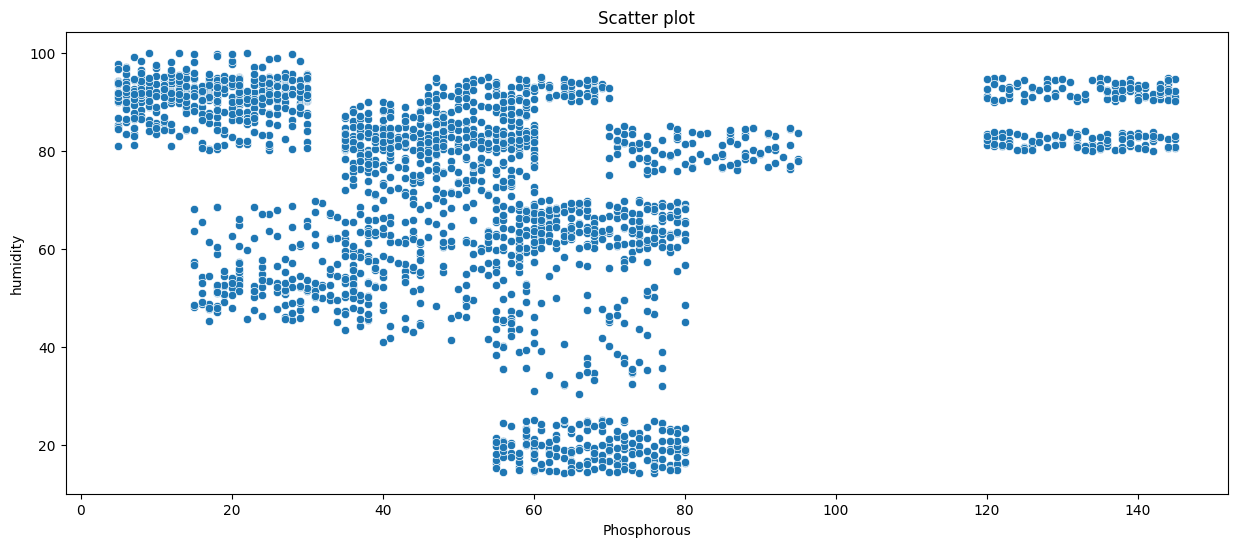

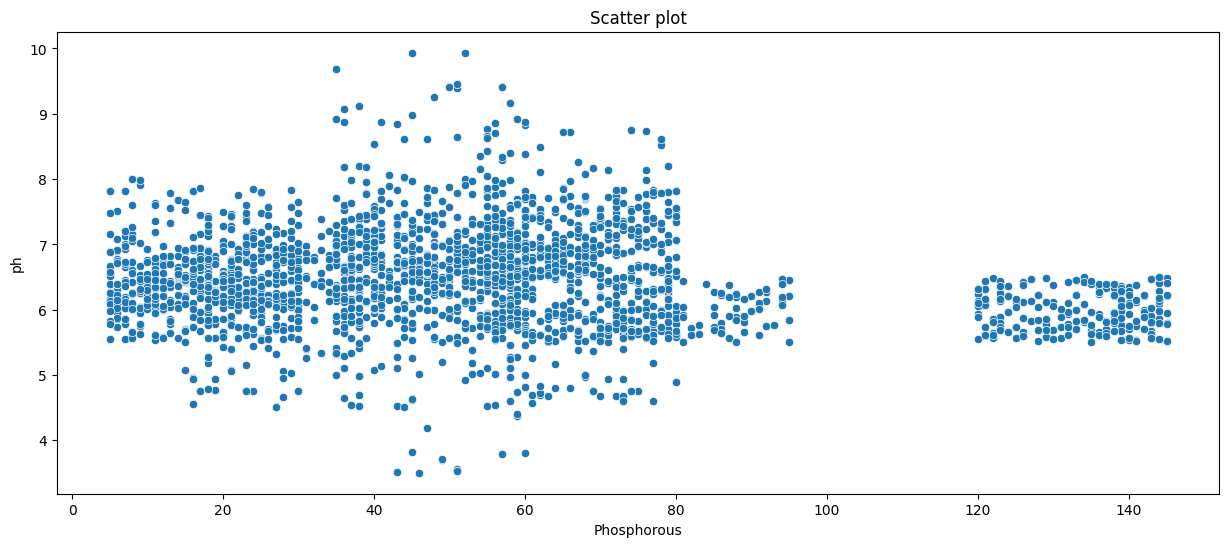

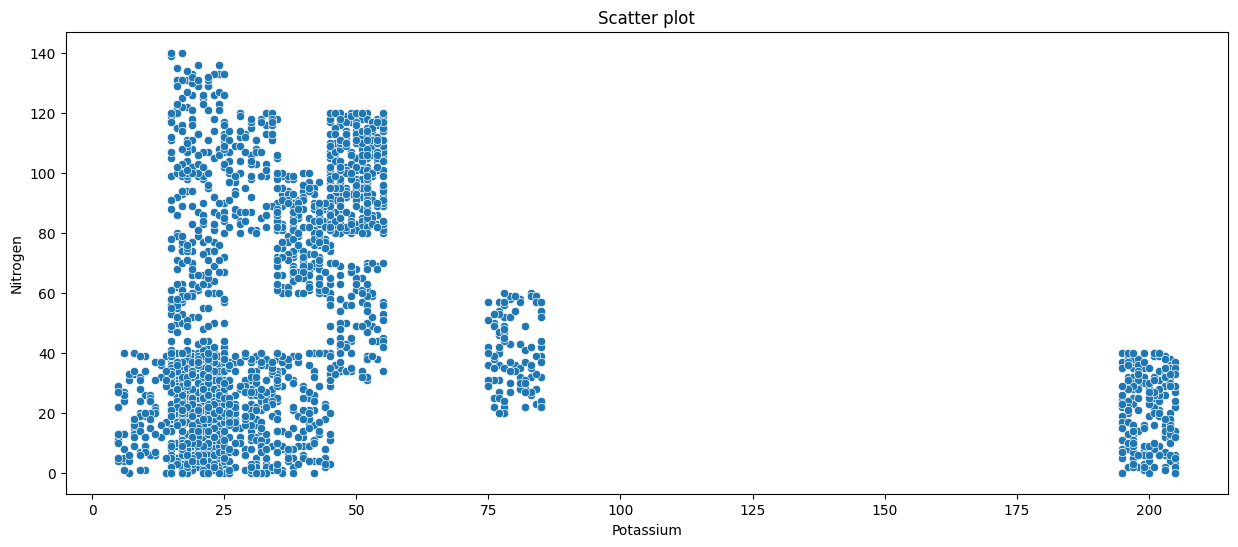

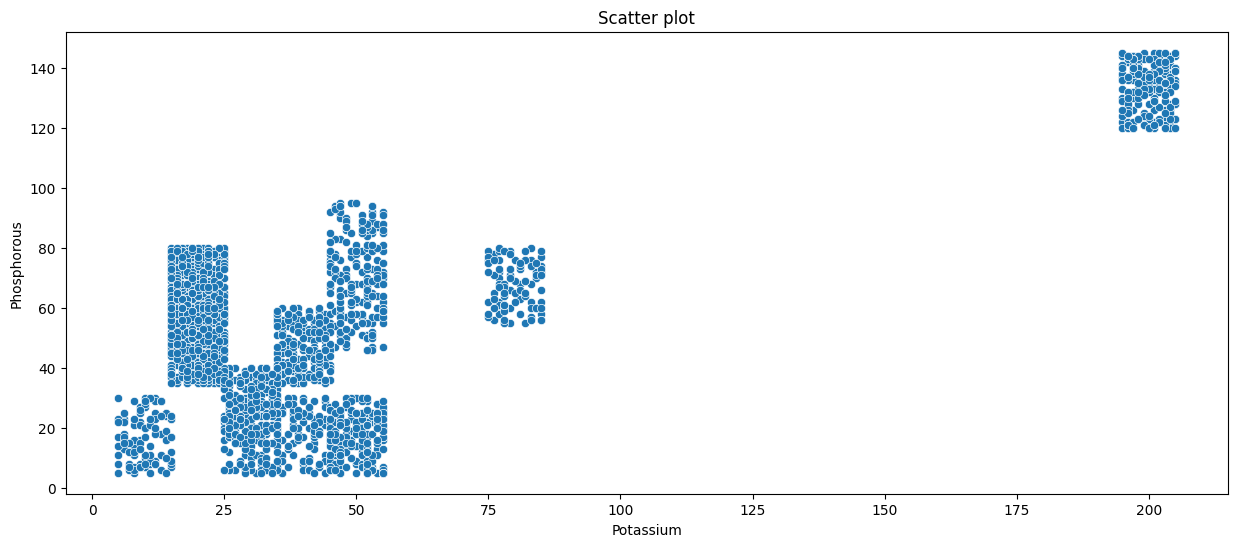

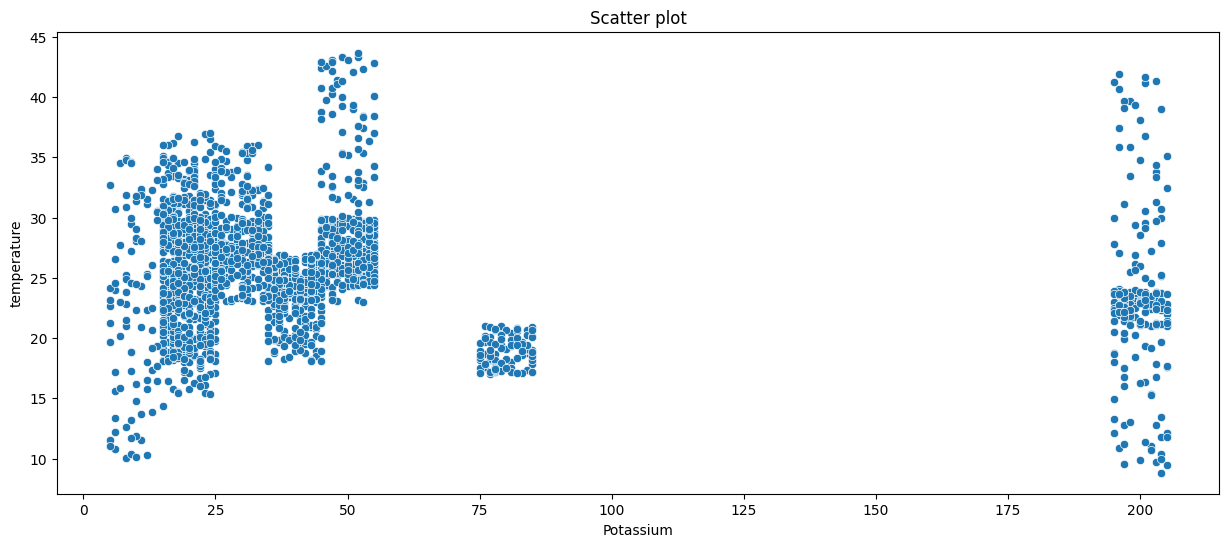

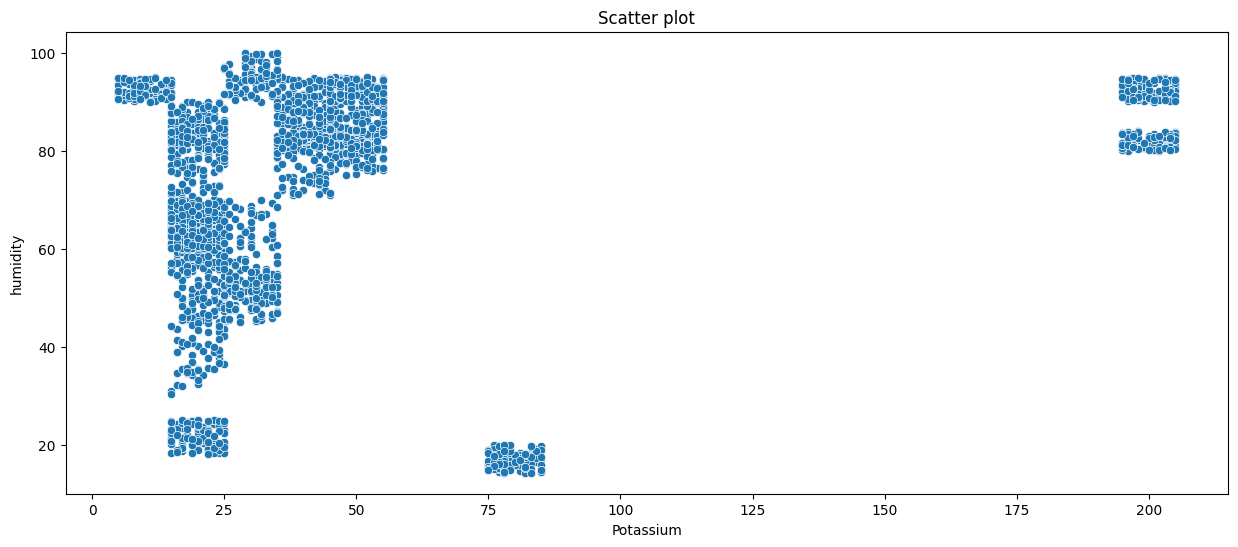

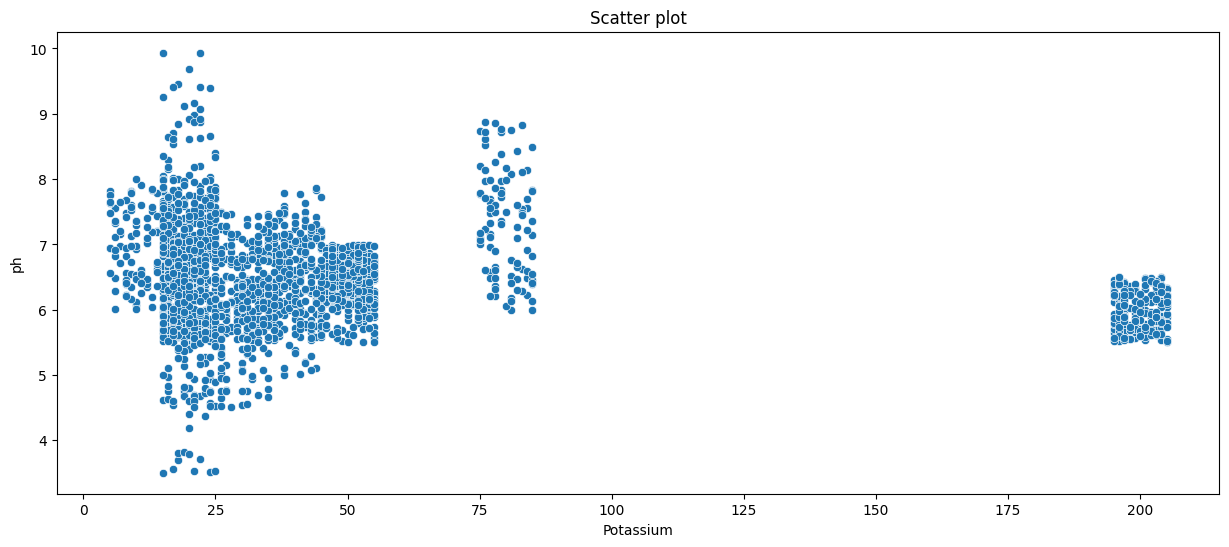

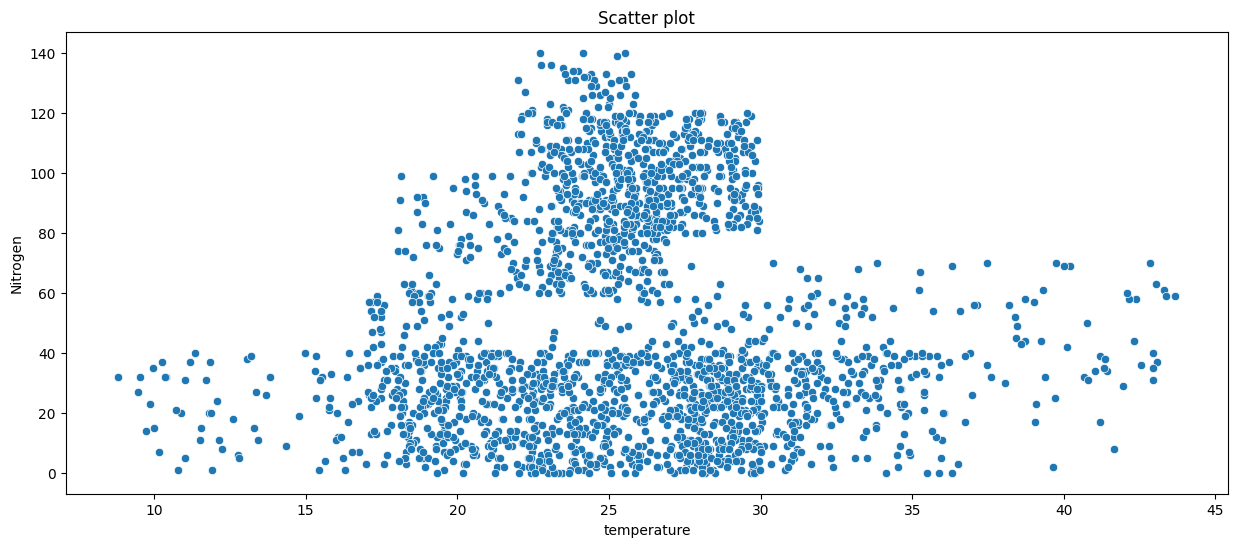

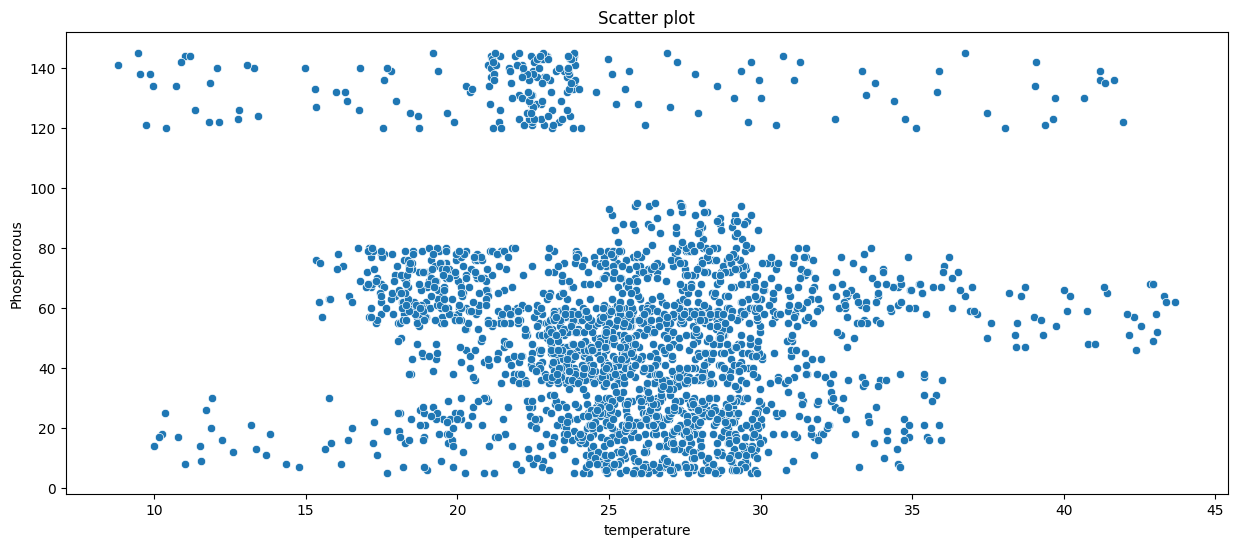

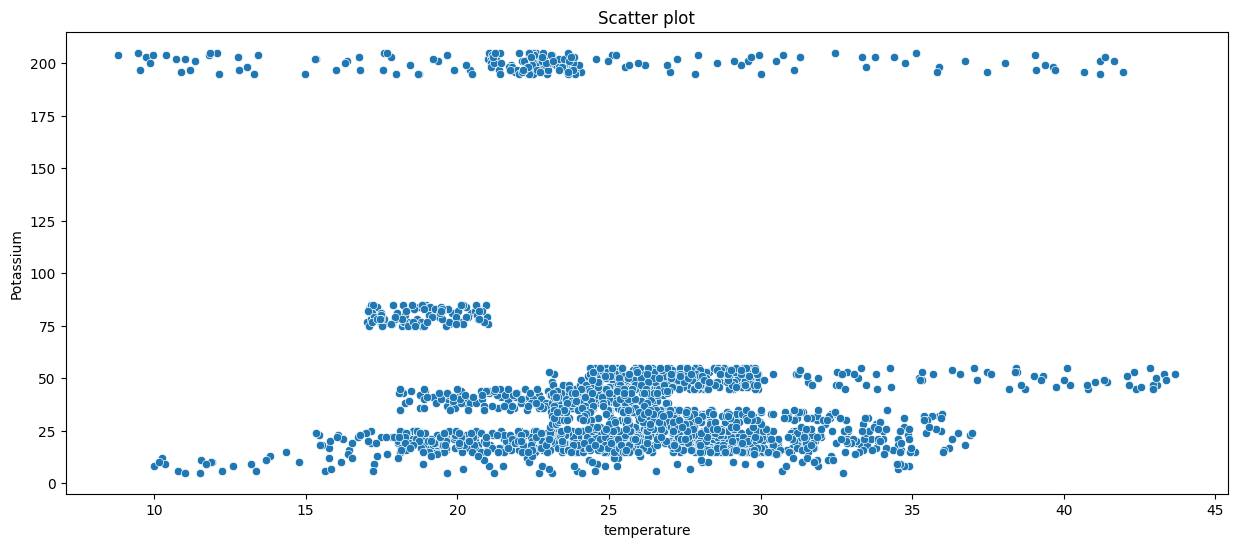

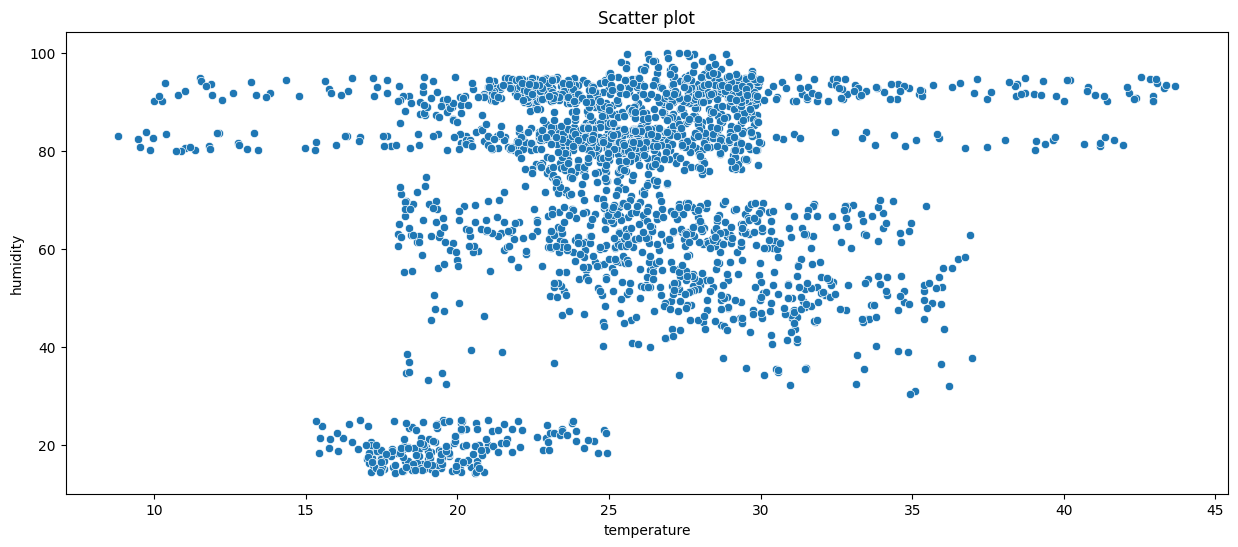

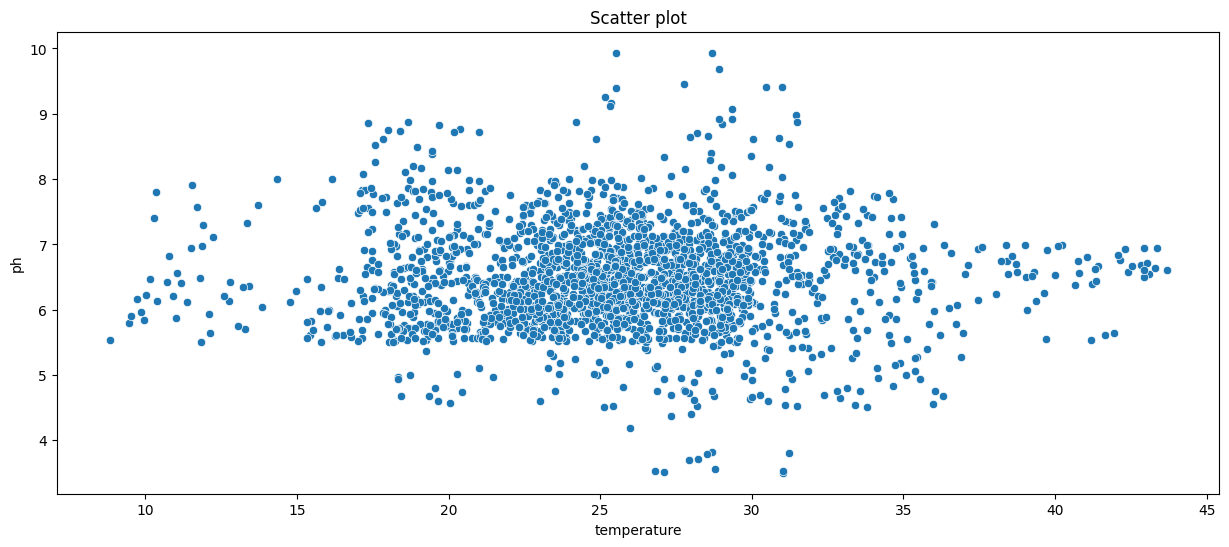

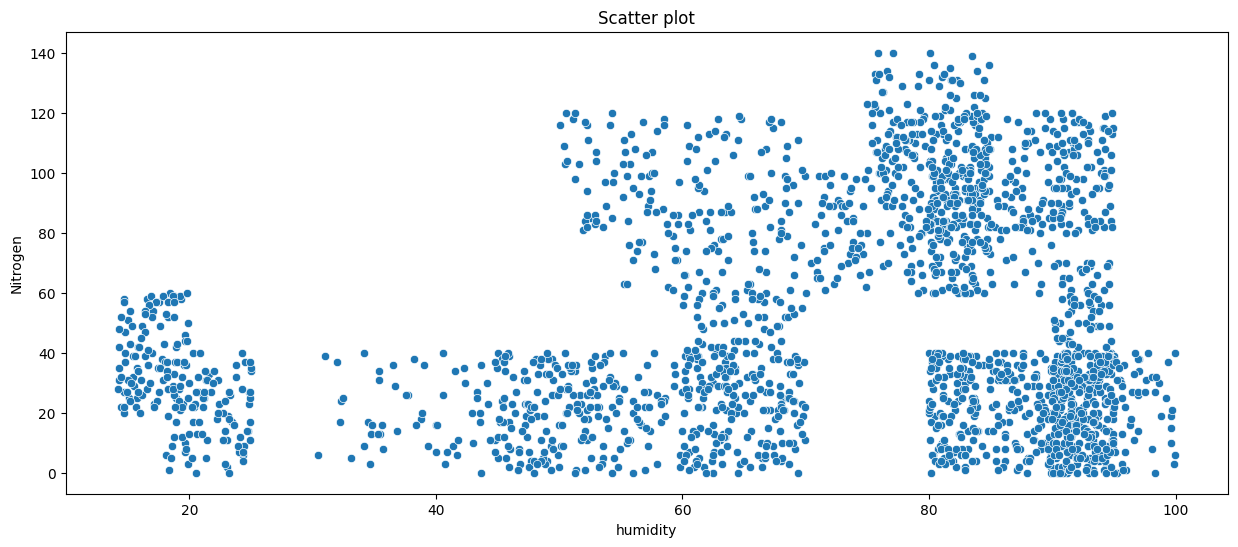

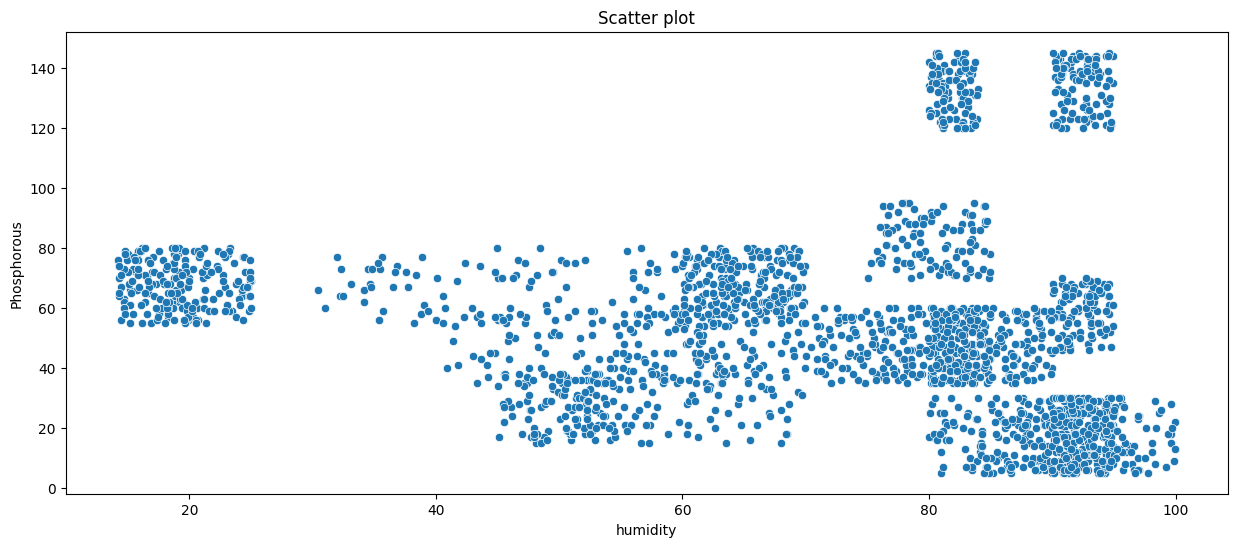

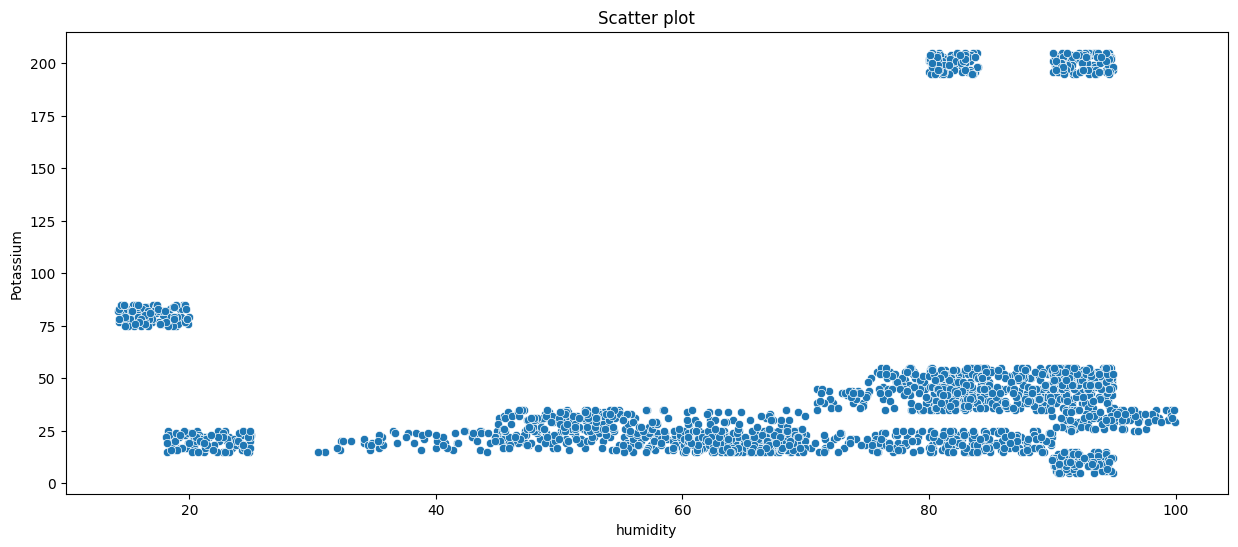

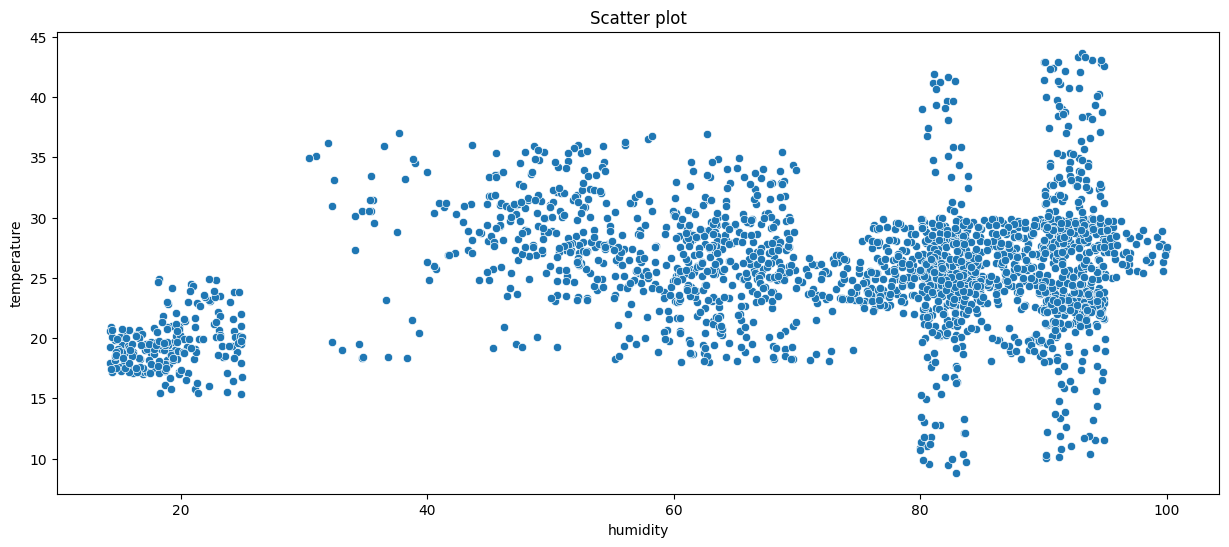

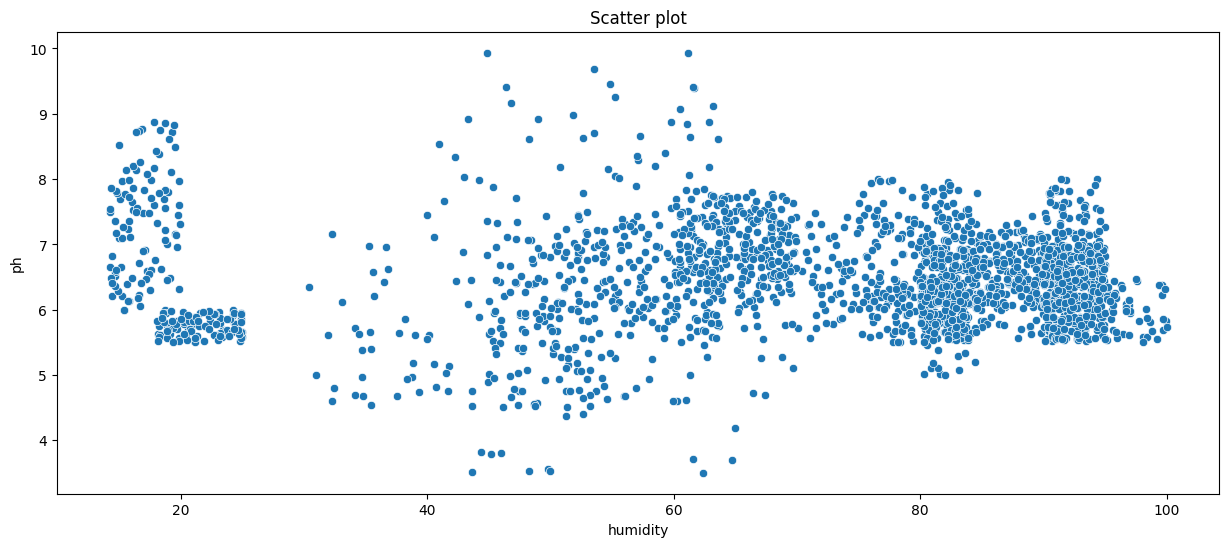

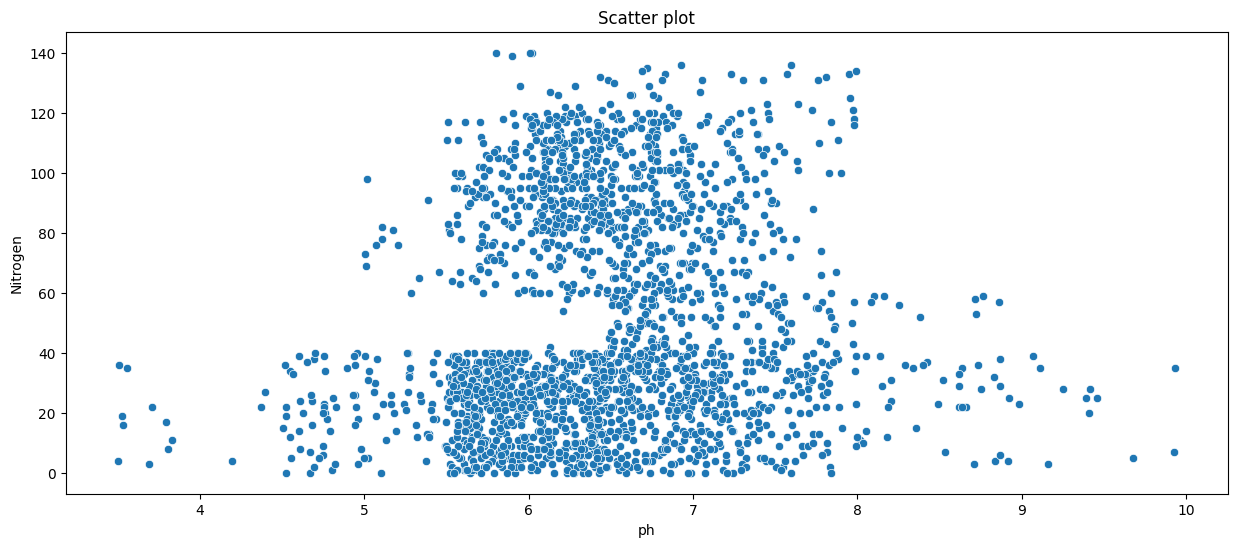

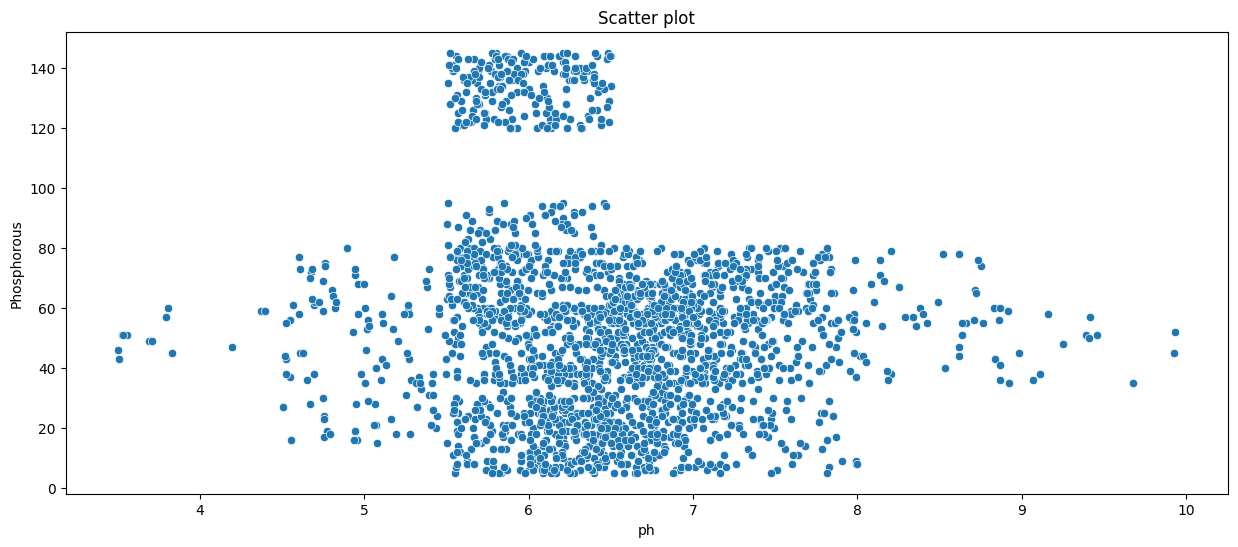

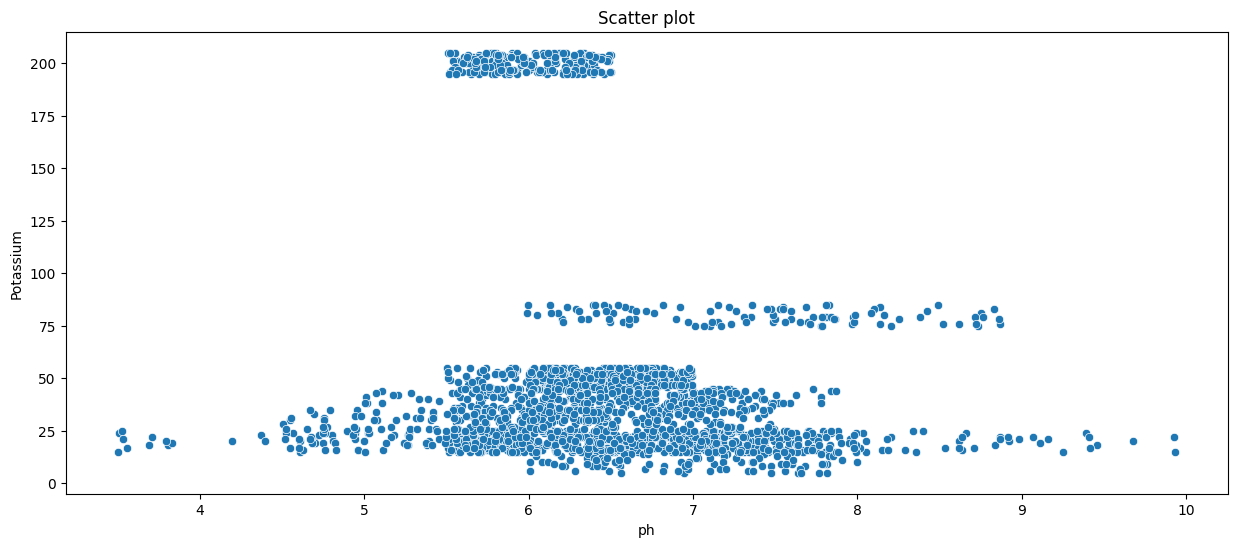

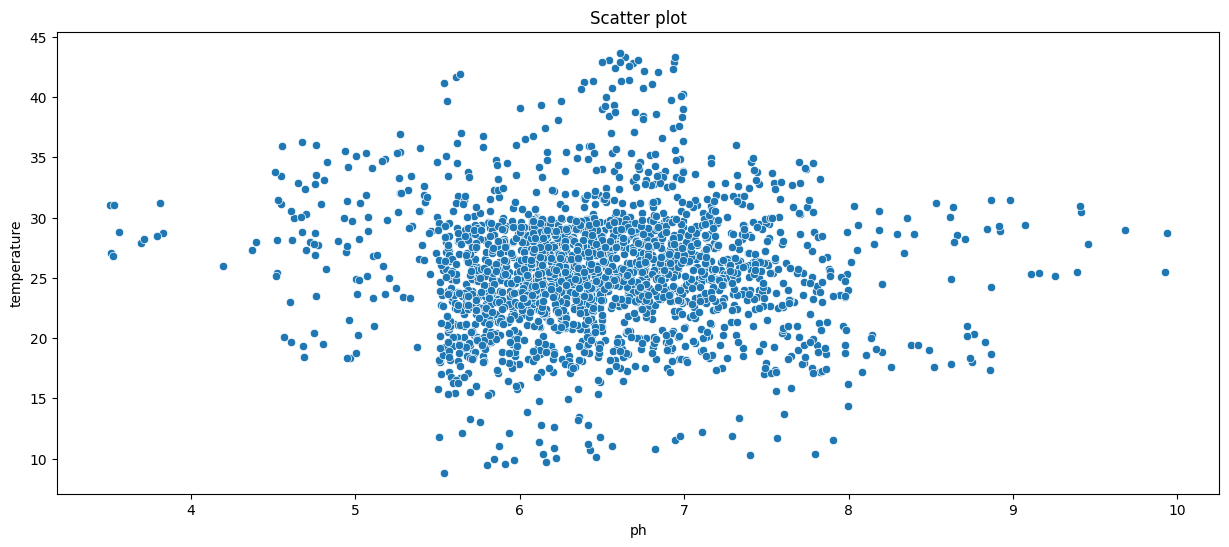

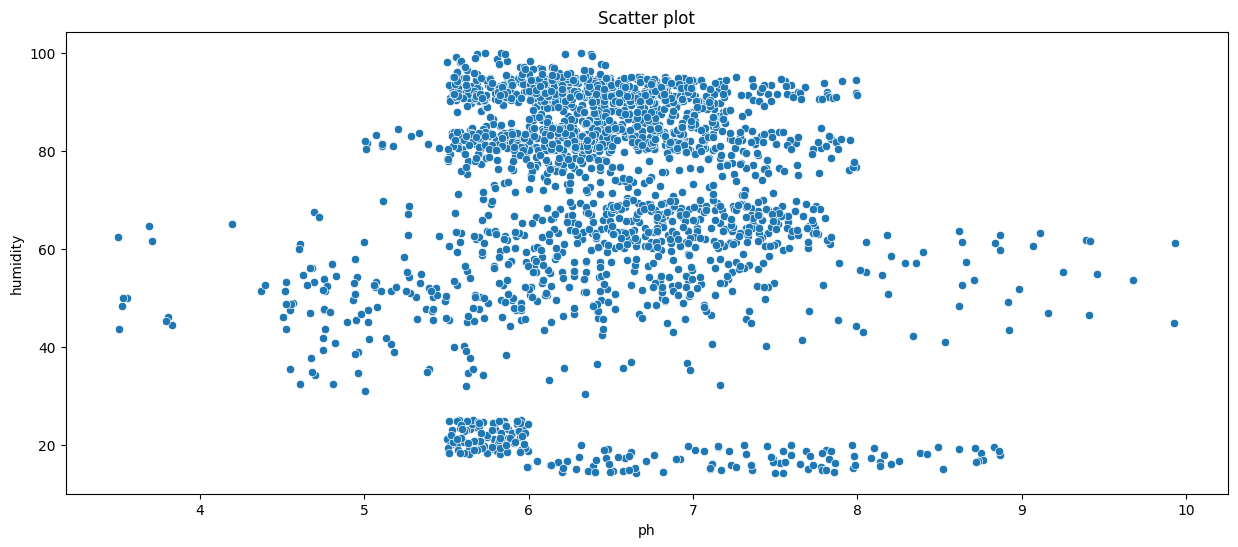

In [23]:
for i in continuous:
    for j in continuous:
        if i !=j:
            plt.figure(figsize=(15, 6))
            sns.scatterplot(x=i, y=j, data=df, palette='hls')
            plt.title(f'Scatter plot')
            plt.show()

In [25]:
corr = df[continuous].corr()

In [26]:
corr

Nitrogen  Phosphorous  Potassium  temperature  humidity        ph
Nitrogen     1.000000    -0.231460  -0.140512     0.026504  0.190688  0.096683
Phosphorous -0.231460     1.000000   0.736232    -0.127541 -0.118734 -0.138019
Potassium   -0.140512     0.736232   1.000000    -0.160387  0.190859 -0.169503
temperature  0.026504    -0.127541  -0.160387     1.000000  0.205320 -0.017795
humidity     0.190688    -0.118734   0.190859     0.205320  1.000000 -0.008483
ph           0.096683    -0.138019  -0.169503    -0.017795 -0.008483  1.000000

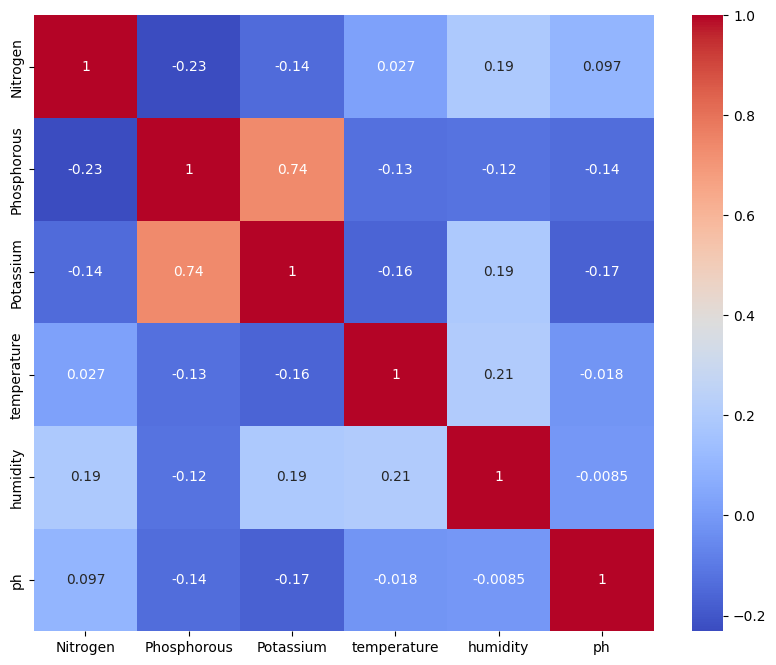

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [28]:
X = df.drop(['label','Seeds'], axis=1)
y = df['label']

In [29]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test=sc.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [40]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [41]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [43]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test,log_reg_pred)
print('Test Accuracy Score: ',log_reg_accuracy)

Test Accuracy Score:  0.9045454545454545


In [49]:
y_pred_train = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('Train Accuracy Score: ',train_accuracy)

Train Accuracy Score:  0.9244318181818182


In [50]:
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Test Accuracy Score: ',acc)

Test Accuracy Score:  0.95


In [51]:
y_pred_train = svc.predict(X_train)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('Train Accuracy Score: ',train_accuracy)

Train Accuracy Score:  0.9505681818181818


In [52]:
y_pred = dtc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Test Accuracy Score: ',acc)

Test Accuracy Score:  0.9659090909090909


In [53]:
y_pred_train = dtc.predict(X_train)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('Train Accuracy Score: ',train_accuracy)

Train Accuracy Score:  1.0


In [54]:
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Test Accuracy Score: ',acc)

Test Accuracy Score:  0.9681818181818181


In [55]:
y_pred_train = rfc.predict(X_train)
train_accuracy = accuracy_score(y_train,y_pred_train)
print('Train Accuracy Score: ',train_accuracy)

Train Accuracy Score:  1.0
